In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../Dataset/Gold.csv")

In [3]:
df.head()

,Date,Open,Close,High,Low
0,2018-01-01,1300.760,1313.075,1316.08375,1300.6425
1,2018-01-02,1302.910,1316.500,1318.91000,1302.8550
2,2018-01-03,1318.375,1318.875,1321.30000,1307.7100
3,2018-01-04,1313.105,1327.875,1327.87500,1306.0500
4,2018-01-05,1322.050,1319.590,1323.50500,1313.9100


In [4]:
df = df[["Close"]]
df.reset_index(drop=True)
df.isnull().sum()

Close    0
dtype: int64

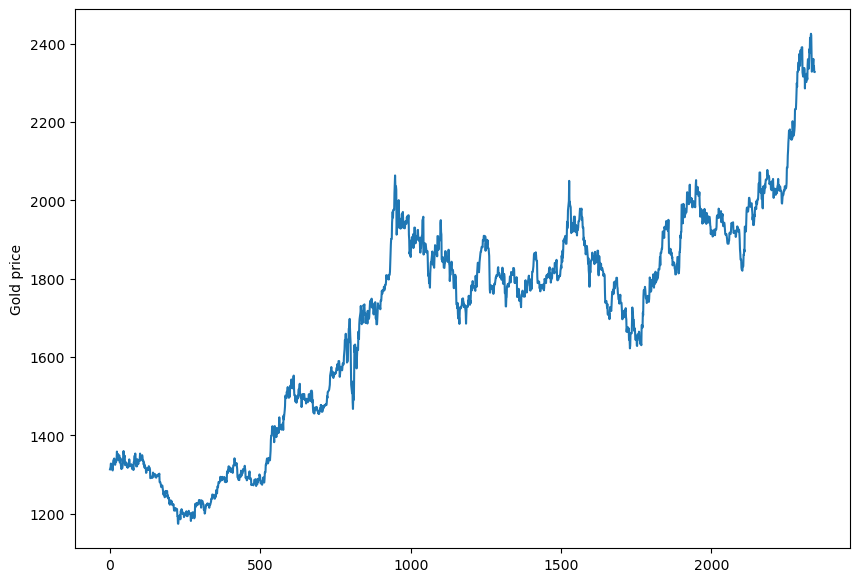

In [5]:
df.Close.plot(figsize = (10, 7))
plt.ylabel("Gold price")
plt.show()


In [6]:
t = .7
t = int(t * len(df))

data_train = df[:t]
data_test = df[t:]

In [7]:
# Chia các tập x,y train, test tương ứng
X_train = np.array(data_train.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_train = np.array(data_train['Close']) #Lấy dữ liệu giá Close

X_test = np.array(data_test.index).reshape(-1, 1)  #Lấy chỉ mục Index
y_test = np.array(data_test['Close']) #Lấy dữ liệu giá Close

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#Tạo mô hình hồi quy tuyến tính y = m*X1 + c
linear = LinearRegression().fit(X_train, y_train)
print("m1: " , linear.coef_[0])
print("c: " , linear.intercept_)

m1:  0.48642721476528206
c:  1194.6997404876563


In [10]:
predicted_price = linear.predict(X_test)
predicted = pd.DataFrame(predicted_price, columns = ['Close'])
predicted

,Close
0,1992.440373
1,1992.926800
2,1993.413227
3,1993.899654
4,1994.386082
...,...
699,2332.452996
700,2332.939423
701,2333.425850
702,2333.912277


In [11]:
mape = np.mean(np.abs(predicted_price - y_test)/np.abs(y_test)) *100
mse = np.mean(np.square(y_test - predicted_price))
rmse = np.sqrt(mse)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Percentage Error (MAPE): 12.218535506758009
Mean Squared Error (MSE): 60421.23577514326
Root Mean Squared Error (RMSE): 245.80731432392986


In [12]:
dt_train = np.append(data_train, predicted['Close'][0]) 

In [13]:
# Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = linear.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[2334.8851319  2335.37155911 2335.85798633 2336.34441354 2336.83084076
 2337.31726797 2337.80369519 2338.2901224  2338.77654962 2339.26297683
 2339.74940405 2340.23583126 2340.72225847 2341.20868569 2341.6951129
 2342.18154012 2342.66796733 2343.15439455 2343.64082176 2344.12724898
 2344.61367619 2345.10010341 2345.58653062 2346.07295784 2346.55938505
 2347.04581227 2347.53223948 2348.0186667  2348.50509391 2348.99152113
 2349.47794834 2349.96437556 2350.45080277 2350.93722998 2351.4236572
 2351.91008441 2352.39651163 2352.88293884 2353.36936606 2353.85579327
 2354.34222049 2354.8286477  2355.31507492 2355.80150213 2356.28792935
 2356.77435656 2357.26078378 2357.74721099 2358.23363821 2358.72006542
 2359.20649264 2359.69291985 2360.17934707 2360.66577428 2361.15220149
 2361.63862871 2362.12505592 2362.61148314 2363.09791035 2363.58433757
 2364.07076478 2364.557192   2365.04361921 2365.53004643 2366.01647364
 2366.50290086 2366.98932807 236

In [14]:
plt.rcParams['figure.figsize'] = [18, 10]

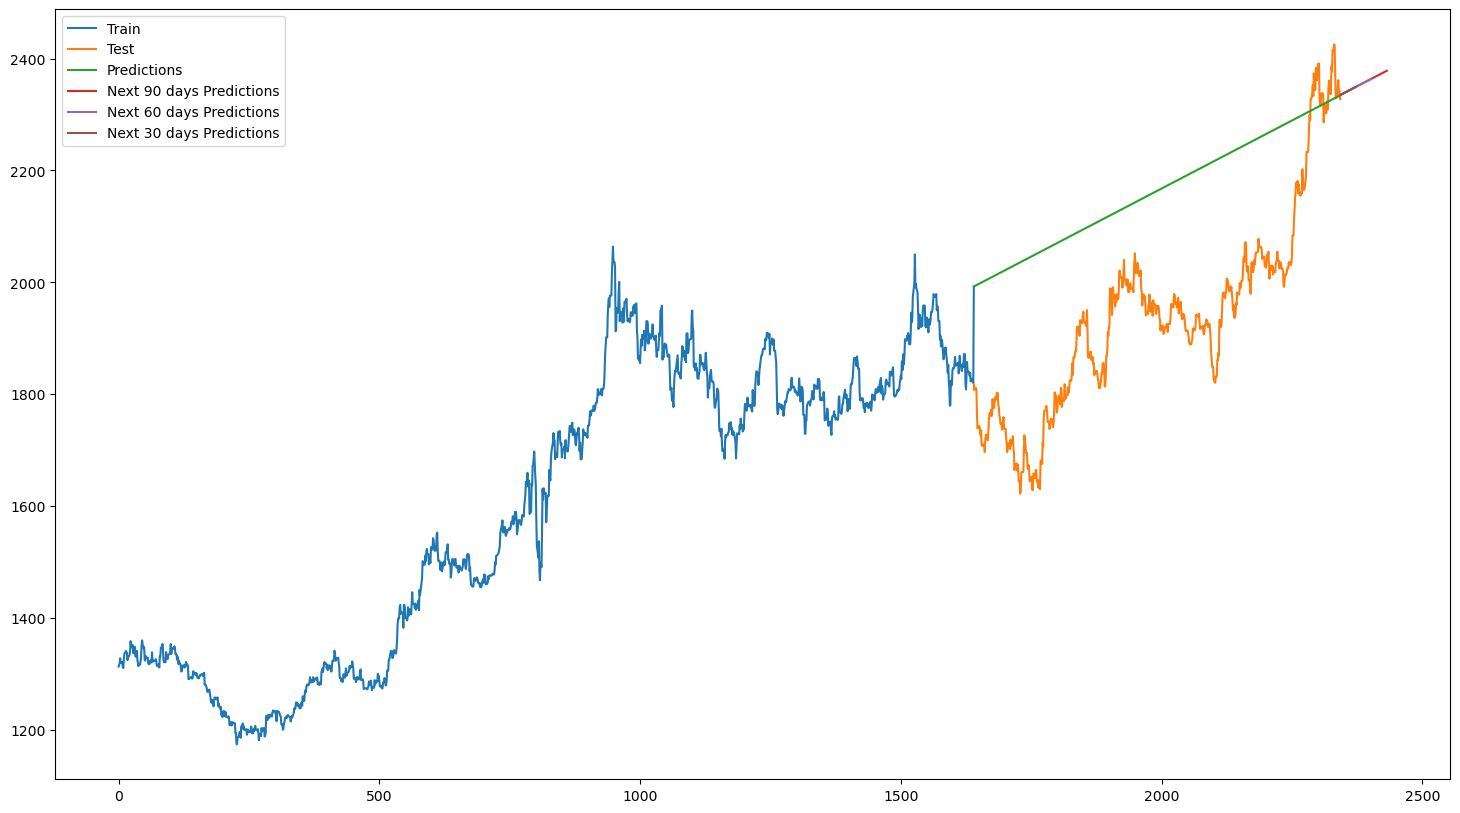

In [15]:
plt.plot(pd.RangeIndex(start=0, stop=len(dt_train), step=1), dt_train)
plt.plot(data_test.index, data_test['Close'])
plt.plot(data_test.index, predicted['Close'])
plt.plot(last_data,y_next_90_days)
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+60, step=1),y_next_90_days[0:60])
plt.plot(pd.RangeIndex(start=last_index, stop=last_index+30, step=1),y_next_90_days[0:30])
plt.legend(['Train', 'Test', 'Predictions', 'Next 90 days Predictions', 'Next 60 days Predictions', 'Next 30 days Predictions'])

plt.show()